[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/Week%204.ipynb)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/COMP30027 (T)/W4/"

Mounted at /content/gdrive


#### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 

## Week 4 - `sklearn` goes brr

This week, we will be using scikit-learn to classify some data, and to evaluate some classifiers.

1. What kind of data to put?
2. Data conversion
3. Running the model
4. Data transformation

In [ ]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt

### Exercise 1.
Please load Car Evaluation dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data).

The common terminology in scikit-learn is that: 
* `X`: the array defining the attribute values
* `y`: the array defining the gold–standard (“ground truth”) 

Your task: create these variables for the car data.

- **(a)** Load the data into a suitable format for scikit-learn:


Old school solution

In [ ]:
X = []
y = []
with open(path+'car.data', mode='r') as fin:
    for line in fin:
        atts = line.strip().split(",")
        X.append(atts[:-1]) #all atts, excluding the class
        y.append(atts[-1])

High school solution

In [ ]:
import pandas as pd
df = pd.read_csv(path+"car.data", header=None)

X_pd = df.iloc[:,:-1]
y_pd = df.iloc[:,-1]

df.sample(5)

,0,1,2,3,4,5,6
934,med,vhigh,4,4,big,med,acc
1639,low,low,2,more,small,med,unacc
461,high,vhigh,3,2,small,high,unacc
183,vhigh,high,4,more,med,low,unacc
151,vhigh,high,3,4,big,med,unacc


University solution

In [ ]:
data_np = np.genfromtxt(path+"car.data", encoding=None, dtype=None, delimiter=",")

X_np = data_np[:,:-1]
y_np = data_np[:,-1]

data_np

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype='<U5')

*'This material is made available to you by or on behalf of the University of Melbourne, under section 113P of the Copyright Act, 1968. It may be subject to copyright. For more information, visit the university copyright website.'* solution

In [ ]:
# Define the mAgiC nUMbERs
fname = 'car.data'
last_index = -1
m = 'r'

# Initiate variables
X = []
y = []

# Open the file
with open(path + fname, mode=m) as fin:
    # Do a loop to reach each row of data
    for line in fin:
      # Strip trailing spaces
      stripped = line.strip()
      # Split into an array of values that are separated by coma
      atts = stripped.split(",")
      # Because last column is class, remove it from instances variable
      X.append(atts[:,:last_index])
      # Last column is the class, or as known as ground-truth, labels, golden standard,...
      y.append(atts[:,last_index])

- **(b)** How many instances are there in this collection? How many attributes, and of what type(s)? What is the class we’re trying to predict, and how many values does it take?

In [ ]:
from collections import Counter
print('There are', len(X), 'instances')
print('There are', len(X[0]), "attributes, for example:", X[0])
print('There are', len(set(y)), "class labels:", set(y))   
#use Counter to count the number of labels
label_counter = Counter(y)
print("Label frequencies: %s" %str(label_counter.most_common()))

There are 1728 instances
There are 6 attributes, for example: ['vhigh', 'vhigh', '2', '2', 'small', 'low']
There are 4 class labels: {'vgood', 'unacc', 'acc', 'good'}
Label frequencies: [('unacc', 1210), ('acc', 384), ('good', 69), ('vgood', 65)]


In [ ]:
# How about pandas dataframe?
print('There are', len(X_pd), 'instances')

print('There are', len(X_pd.columns), "attributes, for example:", X_pd.sample(1).values)

print('There are', len(y_pd.unique()), "class labels:", y_pd.unique())   

print(f"Label frequencies:\n{y_pd.value_counts()}")

There are 1728 instances
There are 6 attributes, for example: [['vhigh' 'vhigh' '2' '2' 'big' 'med']]
There are 4 class labels: ['unacc' 'acc' 'vgood' 'good']
Label frequencies:
unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64


### Exercise 2
Unfortunately, scikit-learn isn’t set up to deal with our attributes in this format.

- **(a)** Write some functions that transform our **categorical** attributes into **numerical** attributes, by (perhaps arbitrarily) assigning each categorical value to an integer, for example:

```python
def convert_class(raw):
    if raw=="unacc": return 0
    elif raw=="acc": return 1
    elif raw=="good": return 2
    elif raw=="vgood": return 3
```


In [ ]:
# We could check this from the "car.names" file linked above
# Here's one (somewhat inefficient) way of reading this from the data itself
feature_1_values = set([X[i][0] for i in range(len(X))])
feature_2_values = set([X[i][1] for i in range(len(X))])
feature_3_values = set([X[i][2] for i in range(len(X))])
feature_4_values = set([X[i][3] for i in range(len(X))])
feature_5_values = set([X[i][4] for i in range(len(X))])
feature_6_values = set([X[i][5] for i in range(len(X))])
print("feature 1: %s" %str(feature_1_values))
print("feature 2: %s" %str(feature_2_values))
print("feature 3: %s" %str(feature_3_values))
print("feature 4: %s" %str(feature_4_values))
print("feature 5: %s" %str(feature_5_values))
print("feature 6: %s" %str(feature_6_values))

                                          # This cell was made by np.array gang

feature 1: {'high', 'vhigh', 'med', 'low'}
feature 2: {'high', 'vhigh', 'med', 'low'}
feature 3: {'5more', '2', '4', '3'}
feature 4: {'2', '4', 'more'}
feature 5: {'big', 'med', 'small'}
feature 6: {'high', 'low', 'med'}


In [ ]:
import numpy as np

# Too many if and elif can be a pain you know
convert_feature_1and2and6 = lambda raw : {k:v for v,k in enumerate(feature_1_values)}[raw]
convert_feature_3 = lambda raw : {k:v for v,k in enumerate(feature_3_values)}[raw]
convert_feature_4 = lambda raw : {k:v for v,k in enumerate(feature_4_values)}[raw]
convert_feature_5 = lambda raw : {k:v for v,k in enumerate(feature_5_values)}[raw]
convert_class = lambda raw : {k:v for v,k in enumerate(set(y))}[raw]

X_ordinal = []
for x in X:
    f1, f2, f3, f4, f5, f6 = x
    f1 = convert_feature_1and2and6(f1)
    f2 = convert_feature_1and2and6(f2)
    f3 = convert_feature_3(f3)
    f4 = convert_feature_4(f4)
    f5 = convert_feature_5(f5)
    f6 = convert_feature_1and2and6(f6)
    x = [f1, f2, f3, f4, f5, f6]
    X_ordinal.append(x)
    
#convert to int array to make sure everything is converted.
X_ordinal = np.array(X_ordinal, dtype='int')


#convert ys
y_numeric = []
for this_y in y:
    this_y = convert_class(this_y)
    y_numeric.append(this_y)

y_num = np.array(y_numeric, dtype='int')


print('X shape: {}, y shape: {}'.format(X_ordinal.shape, y_num.shape))

X shape: (1728, 6), y shape: (1728,)


- **(b)** Split the data into training (80%) and test sets (20%)

In [ ]:
# How to quick check version
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
from sklearn.model_selection import train_test_split # Newer versions
#from sklearn.cross_validation import train_test_split # Older versions

X_train, X_test, y_train, y_test = train_test_split(X_ordinal, y_num, test_size=0.33)
print('X_train: {} X_test: {}'.format(X_train.shape, X_test.shape))

X_train: (1157, 6) X_test: (571, 6)


### Tips: `sklearn` has the following functions for most models:
* `fit()`
* `predict()` / `predict_proba()`
* `score()`
* `transform()` / `fit_transform()`

### Exercise 3.
Read up on different implementations of the Naive Bayes classifier in `sklearn.naive_bayes`. Which one do you think is most suitable for the dataset we have?

- **(a)** Compare the accuracies of all three different kinds of Naive Bayes classifier. Does this accord with your expectations?

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_accs = []
mnb_accs = []
bnb_accs = []
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_ordinal, y_num, test_size=0.33, random_state=i)
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    print("\nGNB score %f " %acc)
    gnb_accs.append(acc)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    print("MNB score %f " %acc)
    mnb_accs.append(acc)
    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    print("BNB score %f " %acc)
    bnb_accs.append(acc)
    
print('\nAvg GNB score: {}'.format(np.mean(gnb_accs)))
print('Avg MNB score: {}'.format(np.mean(mnb_accs)))
print('Avg BNB score: {}'.format(np.mean(bnb_accs)))

    


GNB score 0.656743 
MNB score 0.726795 
BNB score 0.761821 

GNB score 0.693520 
MNB score 0.735552 
BNB score 0.767075 

GNB score 0.677758 
MNB score 0.733800 
BNB score 0.742557 

Avg GNB score: 0.6760070052539403
Avg MNB score: 0.7320490367775833
Avg BNB score: 0.7571511967308816


*It's no real surprise that Multinomial NB doesn't work here; for example "high" (2), is not really "medium" (1) repeated twice.*

*We might have expected that Gaussian NB would work a little bit better here, but the ordering appears to be less significant than the feature values themselves. A secondary concern might the uniform distribution of attribute values.*

Remember Laplace Smoothing?
$$
p_i = \frac{x_i + \alpha}{N + \alpha d}
$$

- **(b)** By default, this implementation of Naive Bayes uses Laplace smoothing. Turn this off, and see what happens — what is the significance of the reported accuracy?

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

mnb_accs = []
bnb_accs = []
# Gaussian NB doesn't use smoothing; all of the probabilities for the Gaussian are already non-zero
# You can try this for yourself, but scikit-learn will flatly refuse to do it
mnb = MultinomialNB(alpha=0)
bnb = BernoulliNB(alpha=0)
mnb.fit(X_train, y_train)
acc = mnb.score(X_test, y_test)
print("MNB score %f " %acc)
    
    
bnb.fit(X_train, y_train)
acc = bnb.score(X_test, y_test)
print("BNB score %f " %acc)

MNB score 0.718039 
BNB score 0.779335 


/Users/hastisamadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/hastisamadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


*Due to the implementation (as log-probabilities), numerical errors would result from unseen events.*



- **(c)** What happens if we change the smoothing parameter ($\alpha$)? Calculate the accuracy for a range of values from 5 to 500. For the very large values, examine the predicted classes for the test instances — what is happening?

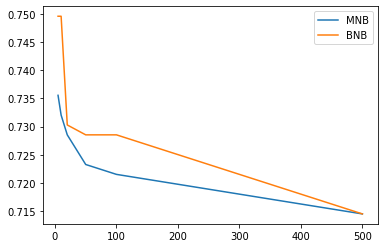

In [ ]:
Alpha_list = [5,10,20,50,100,500]

m_acc=[]
b_acc=[]
for i in Alpha_list:
    mnb = MultinomialNB(alpha=i)
    bnb = BernoulliNB(alpha=i)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    #print("\nMNB with aplha =", i ," score is %f " %acc)
    m_acc.append(acc)

    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    #print("BNB with aplha =", i ," score is %f " %acc)
    b_acc.append(acc)

plt.plot(Alpha_list,m_acc,label="MNB")
plt.plot(Alpha_list,b_acc,label="BNB")
plt.legend()
plt.show()

*For large values of the smoothing parameter, every instance is predicted to be the majority-class - effectively, this is the same behaviour as 0-R!*

### Exercise 4.
The transformation of the data in Q2 implicitly creates ordinal attributes. At first glance, such a strategy does seem reasonable in light of the given values (such as *small, med, big*).
A different strategy would be to `binarise` the attributes: to replace a categorical attribute having `m` values with `m binary attributes`. One way of doing this in scikit-learn is using the **OneHotEncoder** :

```python
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X)
X_trans = ohe.transform(X).toarray()
```

Note that this transformation should be done before we split the data into training and test sets. (Why?)

- **(a)** Check the shape of `X_trans` — how many attributes do we have now? Does this correspond to your expectations?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_ordinal)
X_trans = ohe.transform(X_ordinal).toarray()

print(X_trans.shape)
print('X[0]:', X[0])
print('X_trans[0]:', X_trans[0])


(1728, 21)
X[0]: ['vhigh', 'vhigh', '2', '2', 'small', 'low']
X_trans[0]: [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]


- **(b)** Split the dataset comprised of `one–hot attributes` into **train** and **test** sets. Compare the accuracies of the three Naive Bayes models using ordinal attributes with the three models using `one–hot attributes`: are you surprised? What can we infer?



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_accs = []
mnb_accs = []
bnb_accs = []
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y_num, test_size=0.33, random_state=i)
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    print("\nGNB score %f " %acc)
    gnb_accs.append(acc)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    print("MNB score %f " %acc)
    mnb_accs.append(acc)
    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    print("BNB score %f " %acc)
    bnb_accs.append(acc)
    
print('\nAvg GNB score: {}'.format(np.mean(gnb_accs)))
print('Avg MNB score: {}'.format(np.mean(mnb_accs)))
print('Avg BNB score: {}'.format(np.mean(bnb_accs)))


GNB score 0.793345 
MNB score 0.816112 
BNB score 0.837128 

GNB score 0.824869 
MNB score 0.865149 
BNB score 0.891419 

GNB score 0.789842 
MNB score 0.814361 
BNB score 0.858144 

Avg GNB score: 0.8026853473438411
Avg MNB score: 0.8318739054290717
Avg BNB score: 0.8622300058377116


*This is a fairly drastic difference: Bernoulli NB is still the best option, but both Gaussian and Multinomial NB are no longer useless. It appears that all of these learners can identify meaningful patterns, just by taking the attribute value in isolation (and not in relation to the presumed ordering) - and so, perhaps our original assignment of 0,1,2,3 was too simple to discover patterns.*

*At this point, we can also observe that the default behaviour of scikit-learn's Bernoulli NB is to do ... something ... with non-binary attributes, but it is usually better to make them explicitly binary using the one-hot transformer. (If you're curious, in this case, it's treating whichever value is 0 as "N", and the other values as "Y".)*